In [2]:
import pandas as pd

url='https://drive.google.com/file/d/1-vBpWV0H0cxX5jSeHlQIKXIiosMKwq2t/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)

df.head()




,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,user_id,review_stars,text,date
0,0tGuFBrhM03I6TCLxDQhyg,Dancing Goats Coffee Bar,419 W Ponce De Leon Ave,Decatur,GA,30030,33.775805,-84.303269,4.0,358,1,"{'RestaurantsPriceRange2': '1', 'WiFi': ""'free...","Food, Coffee & Tea, Restaurants, Donuts, Cafes","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...",IqUD0yoRq66PqnbSvRb5JA,1,OMG!! Hate! This place. Rude to me. On so many...,2018-10-06 14:34:51
1,498F3rnpng6qv53S9diTSw,Boston Market,"4607 Braker Ln, Ste 100",Austin,TX,78759,30.399832,-97.744997,3.0,102,1,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...","American (Traditional), Caterers, Chicken Shop...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",n2eAlOnBo1St1p7MWqBFmg,1,Why bother being open on Thanksgiving if you c...,2019-11-28 20:02:11
2,7qBi3FMT2Oz4Jj1hCWwawA,Bea's Nail Salon,75 Blossom Ct,Boston,MA,02114,42.364891,-71.066818,3.0,23,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Nail Salons, Beauty & Spas","{'Monday': '9:30-19:0', 'Tuesday': '9:30-19:0'...",pHTrbVN4lzTlzqqnWEJYGw,1,"The fact that on a Saturday afternoon this ""sa...",2009-07-11 19:59:46
3,K4X4nJVp0BcSn9Cvoavk8A,T'Kilas Tacos & More,1248 Clairmont Rd,Decatur,GA,30030,33.789815,-84.307511,3.0,115,0,"{'GoodForKids': 'True', 'BikeParking': 'False'...","Mexican, Restaurants","{'Monday': '11:0-22:30', 'Tuesday': '11:0-22:3...",Jfc8qYR3uEHIpU0nKzpObg,1,"I came to Los Loros in search of the ""strong, ...",2008-09-08 21:34:50
4,D6U1_06gxciRs1NoYjwhKQ,ESPN Club - Temporarily Unavailable,2101 N Epcot Resorts Blvd,Orlando,FL,32836,28.368008,-81.555289,2.5,303,1,"{'GoodForKids': 'True', 'Caters': 'False', 'Re...","Hotels, American (New), Event Planning & Servi...","{'Monday': '0:0-0:0', 'Tuesday': '12:0-23:0', ...",Dw_oka5MVWOsaJCncfIXZQ,1,My fries were stale and my cheesesteak was mos...,2018-01-14 01:41:50


In [3]:
reviews = df

In [25]:
reviews.shape

(50000, 20)

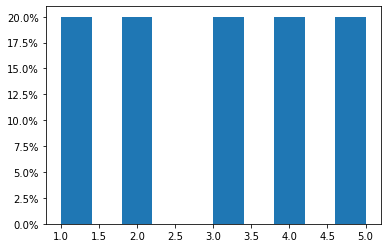

In [5]:
uniformed_review = reviews
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
plt.hist(uniformed_review["review_stars"],weights=np.ones(len(uniformed_review["review_stars"])) / len(uniformed_review["review_stars"]))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

# Fasttest Model

In [6]:
!pip install fasttext
import fasttext as ft
import random
import csv

You should consider upgrading via the '/home/alhelal/anaconda3/bin/python -m pip install --upgrade pip' command.


In [7]:
uniformed_review['ratings'] = '__label__' + uniformed_review['review_stars'].astype(str)
uniformed_review['text_with_rating'] = uniformed_review['ratings']+" " + uniformed_review['text'].astype(str)
review = uniformed_review['text_with_rating']

In [8]:
############################################
#### Data partition for cross validation ###
############################################

index1 = random.sample(list(review.index),int(len(review)*0.8))
index2 = random.sample(list(review.index),int(len(review)*0.8))
index3 = random.sample(list(review.index),int(len(review)*0.8))
index4 = random.sample(list(review.index),int(len(review)*0.8))
index5 = random.sample(list(review.index),int(len(review)*0.8))
index6 = random.sample(list(review.index),int(len(review)*0.8))
index7 = random.sample(list(review.index),int(len(review)*0.8))
index8 = random.sample(list(review.index),int(len(review)*0.8))
index9 = random.sample(list(review.index),int(len(review)*0.8))
index10 = random.sample(list(review.index),int(len(review)*0.8))



# Creating 10 training data set (80% data):

train1 = review.loc[index1]
train2 = review.loc[index2]
train3 = review.loc[index3]
train4 = review.loc[index4]
train5 = review.loc[index5]
train6 = review.loc[index6]
train7 = review.loc[index7]
train8 = review.loc[index8]
train9 = review.loc[index9]
train10 = review.loc[index10]



# Create 10 validation set (10% data)

valid1 = review.drop(index1)
valid2 = review.drop(index2)
valid3 = review.drop(index3)
valid4 = review.drop(index4)
valid5 = review.drop(index5)
valid6 = review.drop(index6)
valid7 = review.drop(index7)
valid8 = review.drop(index8)
valid9 = review.drop(index9)
valid10 = review.drop(index10)


index11 = random.sample(list(valid1.index),int(len(valid1)*0.5))
index12 = random.sample(list(valid2.index),int(len(valid2)*0.5))
index13 = random.sample(list(valid3.index),int(len(valid3)*0.5))
index14 = random.sample(list(valid4.index),int(len(valid4)*0.5))
index15 = random.sample(list(valid5.index),int(len(valid5)*0.5))
index16 = random.sample(list(valid6.index),int(len(valid6)*0.5))
index17 = random.sample(list(valid7.index),int(len(valid7)*0.5))
index18 = random.sample(list(valid8.index),int(len(valid8)*0.5))
index19 = random.sample(list(valid9.index),int(len(valid9)*0.5))
index20 = random.sample(list(valid10.index),int(len(valid10)*0.5))


test1 = valid1.loc[index11]
test2 = valid2.loc[index12]
test3 = valid3.loc[index13]
test4 = valid4.loc[index14]
test5 = valid5.loc[index15]
test6 = valid6.loc[index16]
test7 = valid7.loc[index17]
test8 = valid8.loc[index18]
test9 = valid9.loc[index19]
test10 = valid10.loc[index20]




valid1 = valid1.drop(index11)
valid2 = valid2.drop(index12)
valid3 = valid3.drop(index13)
valid4 = valid4.drop(index14)
valid5 = valid5.drop(index15)
valid6 = valid6.drop(index16)
valid7 = valid7.drop(index17)
valid8 = valid8.drop(index18)
valid9 = valid9.drop(index19)
valid10 = valid10.drop(index20)

In [9]:
# Saving the splitted data to run the models:

train1.to_csv(r'train1.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
test1.to_csv(r'test1.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
valid1.to_csv(r'valid1.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

train2.to_csv(r'train2.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
test2.to_csv(r'test2.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
valid2.to_csv(r'valid2.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

train3.to_csv(r'train3.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
test3.to_csv(r'test3.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
valid3.to_csv(r'valid3.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

train4.to_csv(r'train4.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
test4.to_csv(r'test4.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
valid4.to_csv(r'valid4.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

train5.to_csv(r'train5.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
test5.to_csv(r'test5.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
valid5.to_csv(r'valid5.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

train6.to_csv(r'train6.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
test6.to_csv(r'test6.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
valid6.to_csv(r'valid6.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

train7.to_csv(r'train7.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
test7.to_csv(r'test7.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
valid7.to_csv(r'valid7.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

train8.to_csv(r'train8.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
test8.to_csv(r'test8.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
valid8.to_csv(r'valid8.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

train9.to_csv(r'train9.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
test9.to_csv(r'test9.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
valid9.to_csv(r'valid9.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

train10.to_csv(r'train10.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
test10.to_csv(r'test10.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
valid10.to_csv(r'valid10.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")


In [10]:
# Getting the accuracy for the train data and validation data for 10 different data split for different hyperparameter
# combination. Function inputs are:
# train_data = the train data used to fit the model.
# valid_data = the validation data
# data_split = the data split identification (as we have total 10 data split). The typical cross validation procedure in python
    # cross validation not worked for fasttext, thats why we manually split the data in 10 equal parts previously and
    # saved them in working direcory. The saved splitted data used inside the train_valid_fastext() function.
        
def train_valid_fasttext(train_data,valid_data,data_split):
    model = []
    para = []


    lr = [0.1]
    wng = [3]
    dim = [50]
    epoch = [1,2,3,4,5,6,7,8,9,10]
    
    for learning_rate in range(len(lr)):
        for wordngram in range(len(wng)):
            for layer in range(len(dim)):
                for epo in range(len(epoch)):
                    model.append(ft.train_supervised(train_data, lr = lr[learning_rate],dim = dim[layer], epoch = epoch[epo], wordNgrams=wng[wordngram]))
                    para.append((lr[learning_rate],wng[wordngram],dim[layer],epoch[epo]))


    accu_train = []
    accu_valid = []

    for i in range(len(model)):
        accu_train.append(model[i].test(train_data))


    for i in range(len(model)):
        accu_valid.append(model[i].test(valid_data))
  
  
    accu_train = pd.DataFrame(accu_train)
    del accu_train[2]
    accu_train.columns = ["Number of observation in training","Accuracy on training data"] 



    accu_valid = pd.DataFrame(accu_valid)
    del accu_valid[2]
    accu_valid.columns = ["Number of observation in validation","Accuracy on validation data"] 



    accu_train_test = pd.concat([accu_train,accu_valid], axis=1)
    parameter = pd.DataFrame(para) 
    parameter.columns = ["Learning Rate","Word Ngram","Number of layers","Epochs"]


    results = pd.concat([parameter,accu_train_test],axis=1)
    res = [data_split] * len(results)
    results["Data"] = res
    
    return(results)


In [11]:
r1 = train_valid_fasttext(train_data = "train1.txt",valid_data = "valid1.txt",data_split="Data Split 1")

In [12]:
r2 = train_valid_fasttext(train_data = "train2.txt",valid_data = "valid2.txt",data_split="Data Split 2")

In [13]:
r3 = train_valid_fasttext(train_data = "train3.txt",valid_data = "valid3.txt",data_split="Data Split 3")

In [14]:
r4 = train_valid_fasttext(train_data = "train4.txt",valid_data = "valid4.txt",data_split="Data Split 4")

In [15]:
r5 = train_valid_fasttext(train_data = "train5.txt",valid_data = "valid5.txt",data_split="Data Split 5")

In [16]:
r6 = train_valid_fasttext(train_data = "train6.txt",valid_data = "valid6.txt",data_split="Data Split 6")

In [17]:
r7 = train_valid_fasttext(train_data = "train7.txt",valid_data = "valid7.txt",data_split="Data Split 7")

In [18]:
r8 = train_valid_fasttext(train_data = "train8.txt",valid_data = "valid8.txt",data_split="Data Split 8")

In [19]:
r9 = train_valid_fasttext(train_data = "train9.txt",valid_data = "valid9.txt",data_split="Data Split 9")

In [20]:
r10 = train_valid_fasttext(train_data = "train10.txt",valid_data = "valid10.txt",data_split="Data Split 10")

# Outputs

In [21]:
combined_results = r1.append([r2,r3,r4,r5,r6,r7,r8,r9,r10],ignore_index=True)
accuracy_training = combined_results.groupby('Epochs', as_index=False)['Accuracy on training data'].mean()
accuracy_test = combined_results.groupby('Epochs', as_index=False)['Accuracy on validation data'].mean()
accu_train_test = pd.concat([accuracy_training,accuracy_test],axis=1)
accu_train_test

,Epochs,Accuracy on training data,Epochs,Accuracy on validation data
0,1,0.320055,1,0.31482
1,2,0.333660,2,0.33126
2,3,0.422322,3,0.40682
3,4,0.494723,4,0.45668
4,5,0.553630,5,0.48548
5,6,0.608330,6,0.50330
6,7,0.660545,7,0.51558
7,8,0.712283,8,0.52078
8,9,0.762082,9,0.52542
9,10,0.809802,10,0.52858


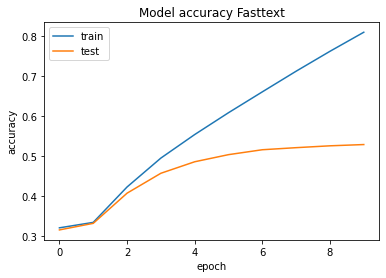

In [22]:
# summarize history for accuracy
plt.plot(accu_train_test['Accuracy on training data'])
plt.plot(accu_train_test['Accuracy on validation data'])
plt.title('Model accuracy Fasttext')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
combined_results.loc[combined_results['Accuracy on validation data'].idxmax()]

Learning Rate                                   0.1
Word Ngram                                        3
Number of layers                                 50
Epochs                                           10
Number of observation in training             40000
Accuracy on training data                  0.811775
Number of observation in validation            5000
Accuracy on validation data                  0.5348
Data                                   Data Split 7
Name: 69, dtype: object

In [24]:
combined_results.loc[combined_results['Accuracy on training data'].idxmax()]

Learning Rate                                   0.1
Word Ngram                                        3
Number of layers                                 50
Epochs                                           10
Number of observation in training             40000
Accuracy on training data                  0.812425
Number of observation in validation            5000
Accuracy on validation data                  0.5238
Data                                   Data Split 2
Name: 19, dtype: object

# LSTM 

In [26]:
X, y = (uniformed_review['text'].values, uniformed_review['review_stars'].values)

In [27]:
#Tokenize the text
import tensorflow as tf
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=None,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True, split=' ', char_level=False, oov_token=None,
    document_count=0)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [28]:
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

In [29]:
X_pad = tf.keras.preprocessing.sequence.pad_sequences(X_seq, maxlen=280, padding='post')
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size = 0.20, random_state = 1)

# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [30]:
batch_size = 64
X_train1 = X_train[batch_size:]
y_train1 = y_train_enc[batch_size:]
X_valid = X_train[:batch_size]
y_valid = y_train_enc[:batch_size]

In [31]:
vocabulary_size = len(tokenizer.word_counts.keys())+1
max_words = 280
embedding_size = 32

#opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(tf.keras.layers.LSTM(200))
model.add(tf.keras.layers.Dense(5, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
history = model.fit(X_train1,y_train1,validation_data=(X_valid,y_valid),batch_size=batch_size,epochs=10)

Epoch 1/10
624/624 [==============================] - 176s 280ms/step - loss: 1.6093 - accuracy: 0.2057 - val_loss: 1.6473 - val_accuracy: 0.1875
Epoch 2/10
624/624 [==============================] - 174s 278ms/step - loss: 1.5917 - accuracy: 0.2234 - val_loss: 1.5213 - val_accuracy: 0.3281
Epoch 3/10
624/624 [==============================] - 174s 278ms/step - loss: 1.5277 - accuracy: 0.2929 - val_loss: 1.5822 - val_accuracy: 0.2500
Epoch 4/10
624/624 [==============================] - 173s 277ms/step - loss: 1.5401 - accuracy: 0.2820 - val_loss: 1.5913 - val_accuracy: 0.2500
Epoch 5/10
624/624 [==============================] - 173s 278ms/step - loss: 1.5139 - accuracy: 0.3067 - val_loss: 1.6090 - val_accuracy: 0.2812
Epoch 6/10
624/624 [==============================] - 172s 276ms/step - loss: 1.5897 - accuracy: 0.2328 - val_loss: 1.5585 - val_accuracy: 0.3125
Epoch 7/10
624/624 [==============================] - 169s 271ms/step - loss: 1.4821 - accuracy: 0.3195 - val_loss: 1.3834 -

In [33]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test_enc, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 50.07


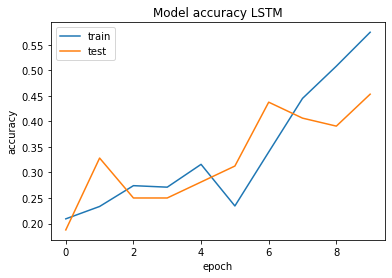

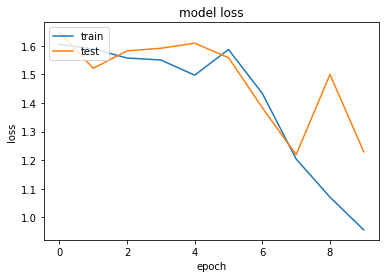

In [34]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy LSTM')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# BERT Model:

In [35]:
!pip install transformers
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

     |████████████████████████████████| 3.1 MB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 895 kB 5.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 5.7 MB/s eta 0:00:01
     |████████████████████████████████| 59 kB 4.8 MB/s eta 0:00:011
You should consider upgrading via the '/home/alhelal/anaconda3/bin/python -m pip install --upgrade pip' command.


In [36]:
#######################################
### -------- Load libraries ------- #### Load Huggingface transformers
from transformers import TFBertModel,  BertConfig, BertTokenizerFast# Then what you need from tensorflow.keras
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical# And pandas for data import + sklearn because you allways need sklearn
import pandas as pd
from sklearn.model_selection import train_test_split

import numpy as np

In [37]:
df = [df.text,df.review_stars]
headers = ["Text", "Rating"]
data = pd. concat(df, axis=1, keys=headers)
data.head()

,Text,Rating
0,OMG!! Hate! This place. Rude to me. On so many...,1
1,Why bother being open on Thanksgiving if you c...,1
2,"The fact that on a Saturday afternoon this ""sa...",1
3,"I came to Los Loros in search of the ""strong, ...",1
4,My fries were stale and my cheesesteak was mos...,1


In [38]:
data['Rating'] = data['Rating'].apply(np.int64)
data['Rating'] = pd.Categorical(data['Rating'])

# Transform your output to numeric
data['Rating'] = data['Rating'].cat.codes
data, data_test = train_test_split(data, test_size = 0.2)


In [39]:
#######################################
### --------- Setup BERT ---------- ###

# Name of the BERT model to use
model_name = 'bert-base-uncased'

# Max length of tokens
max_length = 50

# Load transformers config and set output_hidden_states to False
config = BertConfig.from_pretrained(model_name)
config.output_hidden_states = False

# Load BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained(pretrained_model_name_or_path = model_name, config = config)

# Load the Transformers BERT model
transformer_model = TFBertModel.from_pretrained(model_name, config = config)

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [40]:

#######################################
### ------- Build the model ------- ###

# TF Keras documentation: https://www.tensorflow.org/api_docs/python/tf/keras/Model

# Load the MainLayer
bert = transformer_model.layers[0]

# Build your model input
input_ids = Input(shape=(max_length,), name='input_ids', dtype='int32')
# attention_mask = Input(shape=(max_length,), name='attention_mask', dtype='int32') 
# inputs = {'input_ids': input_ids, 'attention_mask': attention_mask}
inputs = {'input_ids': input_ids}

# Load the Transformers BERT model as a layer in a Keras model
bert_model = bert(inputs)[1]
dropout = Dropout(config.hidden_dropout_prob, name='pooled_output')
pooled_output = dropout(bert_model, training=False)

# Then build your model output
Rating = Dense(units=len(data.Rating.value_counts()), kernel_initializer=TruncatedNormal(stddev=config.initializer_range), name='Rating')(pooled_output)
#product = Dense(units=len(data.Product_label.value_counts()), kernel_initializer=TruncatedNormal(stddev=config.initializer_range), name='product')(pooled_output)
outputs = {'Rating': Rating}

# And combine it all in a model object
model = Model(inputs=inputs, outputs=outputs, name='BERT_MultiLabel_MultiClass')

# Take a look at the model
model.summary()

Model: "BERT_MultiLabel_MultiClass"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_ids (InputLayer)       [(None, 50)]              0         
_________________________________________________________________
bert (TFBertMainLayer)       TFBaseModelOutputWithPool 109482240 
_________________________________________________________________
pooled_output (Dropout)      (None, 768)               0         
_________________________________________________________________
Rating (Dense)               (None, 5)                 3845      
Total params: 109,486,085
Trainable params: 109,486,085
Non-trainable params: 0
_________________________________________________________________


In [41]:
#######################################
### ------- Train the model ------- ###

# Set an optimizer
optimizer = Adam(
    learning_rate=5e-05,
    epsilon=1e-08,
    decay=0.01,
    clipnorm=1.0)

# Set loss and metrics
loss = {'Rating': CategoricalCrossentropy(from_logits = True)}
metric = {'Rating': CategoricalAccuracy('accuracy')}

# Compile the model
model.compile(
    optimizer = optimizer,
    loss = loss, 
    metrics = metric)


In [42]:
# Ready output data for the model
y_rating = to_categorical(data['Rating'])

In [43]:
# Tokenize the input (takes some time)
x = tokenizer(
    text=data['Text'].to_list(),
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [44]:
# Fit the model
history = model.fit(
    # x={'input_ids': x['input_ids'], 'attention_mask': x['attention_mask']},
    x={'input_ids': x['input_ids']},
    y={'Rating': y_rating},
    validation_split=0.2,
    batch_size=100,
    epochs=10)

Epoch 1/10
320/320 [==============================] - 3143s 10s/step - loss: 1.2372 - accuracy: 0.4509 - val_loss: 1.0207 - val_accuracy: 0.5631
Epoch 2/10
320/320 [==============================] - 3131s 10s/step - loss: 0.9230 - accuracy: 0.6081 - val_loss: 1.0156 - val_accuracy: 0.5704
Epoch 3/10
320/320 [==============================] - 3080s 10s/step - loss: 0.8424 - accuracy: 0.6499 - val_loss: 1.0327 - val_accuracy: 0.5751
Epoch 4/10
320/320 [==============================] - 3079s 10s/step - loss: 0.7830 - accuracy: 0.6771 - val_loss: 1.0607 - val_accuracy: 0.5715
Epoch 5/10
320/320 [==============================] - 3075s 10s/step - loss: 0.7451 - accuracy: 0.6958 - val_loss: 1.0969 - val_accuracy: 0.5631
Epoch 6/10
320/320 [==============================] - 3074s 10s/step - loss: 0.7070 - accuracy: 0.7154 - val_loss: 1.1099 - val_accuracy: 0.5651
Epoch 7/10
320/320 [==============================] - 3081s 10s/step - loss: 0.6708 - accuracy: 0.7286 - val_loss: 1.1333 - val_ac

# Evaluation of BERT 

## Plot the accuracy and loss over time

In [51]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


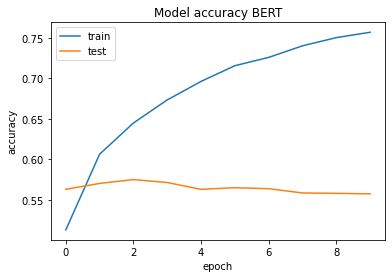

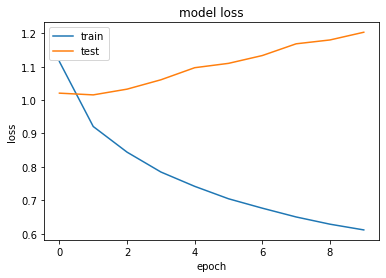

In [52]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy BERT')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Accuracy on test data

In [ ]:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert

#https://towardsdatascience.com/multi-label-multi-class-text-classification-with-bert-transformer-and-keras-c6355eccb63a

In [55]:
# Tokenize the input (takes some time)
x_test = tokenizer(
    text=data_test['Text'].to_list(),
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)


# Ready output data for the model
y_rating_test = to_categorical(data_test['Rating'])

In [56]:
loss, accuracy = model.evaluate(x_test['input_ids'],y={'Rating': y_rating_test})

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')


313/313 [==============================] - 315s 1s/step - loss: 1.1789 - accuracy: 0.5629
Loss: 1.178885817527771
Accuracy: 0.5629000067710876


## Testing the predicted output on NMT Google reviews:

In [64]:
# initialize list of lists
nmt_data = [['Love the atmosphere of this place. Love taking my dogs for walks at the college, beautiful rose garden during the summer months. Ducks at the pond will chase you sometimes for food..found out you can fish here but its catch and release which is good.. Well lit walking at night is good. Plus they have Starbucks in the Fidel center! Awesome.. during the evening at sunset the mountain in the back ground is something', 5], 
             ['Great school and campus.', 5], 
             ['Clean campus. Good college atmosphere.', 5],
            ['I learned to make energetics with kitchenware. In the evenings, I threw many parties with people drinking from labware, leaving them schizophrenically intoxicated. I enjoyed it like Nuremberg Standards that I learned at this establishment. This is one of the most relax places. They look the other way because I come from higher standards than those.', 1],
           ['Always a pleasure', 4],
           ['Friendly staff beautiful grounds', 4],
           ['Everyone Cheats at this school.',1]]
  
# Create the pandas DataFrame
nmt_review = pd.DataFrame(nmt_data, columns = ['Text', 'Rating'])
nmt_review 

,Text,Rating
0,Love the atmosphere of this place. Love taking...,5
1,Great school and campus.,5
2,Clean campus. Good college atmosphere.,5
3,I learned to make energetics with kitchenware....,1
4,Always a pleasure,4
5,Friendly staff beautiful grounds,4
6,Everyone Cheats at this school.,1


In [65]:
# Tokenize the input (takes some time)
nmt_test = tokenizer(
    text=nmt_review['Text'].to_list(),
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [150]:
#model.predict(nmt_test['input_ids'])
pred_output = model.predict(nmt_test['input_ids'])

key, val = next(iter(pred_output.items()))
predicted_weight = pd.DataFrame(val)

# get the index position of max values in every column
maxValueIndexObj = predicted_weight.idxmax(axis=1)
#predicted_weight['Predicted_Star_BERT'] = maxValueIndexObj+1
#predicted_weight

nmt_review['Predicted_Star_BERT'] = maxValueIndexObj+1
nmt_review

,Text,Rating,Predicted_Star_BERT
0,Love the atmosphere of this place. Love taking...,5,5
1,Great school and campus.,5,4
2,Clean campus. Good college atmosphere.,5,4
3,I learned to make energetics with kitchenware....,1,4
4,Always a pleasure,4,4
5,Friendly staff beautiful grounds,4,4
6,Everyone Cheats at this school.,1,1
